#**Pattern Recognition and Machine Learning 2022 Winter Semester**

##**Course Bonus Project**
##**Bitcoin Price Prediction**

####Name: Dev Goel
####Roll No: B20CS090

##Importing the Necessary Python Libraries and Components

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
import warnings
warnings.filterwarnings("ignore")
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression as LR
from sklearn.ensemble import RandomForestRegressor as RFR
from xgboost import XGBRegressor
import warnings
warnings.filterwarnings("ignore")

##Dataset Pre-Processing

In [3]:
dataset = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/DataSet/Bonus Project/bitcoin_price_bitcoin_price.2013Apr-2017Aug.csv")
dataset

,Date,Open,High,Low,Close,Volume,Market Cap
0,"Jul 31, 2017",2763.24,2889.62,2720.61,2875.34,"860,575,000","45,535,800,000"
1,"Jul 30, 2017",2724.39,2758.53,2644.85,2757.18,"705,943,000","44,890,700,000"
2,"Jul 29, 2017",2807.02,2808.76,2692.80,2726.45,"803,746,000","46,246,700,000"
3,"Jul 28, 2017",2679.73,2897.45,2679.73,2809.01,"1,380,100,000","44,144,400,000"
4,"Jul 27, 2017",2538.71,2693.32,2529.34,2671.78,"789,104,000","41,816,500,000"
...,...,...,...,...,...,...,...
1551,"May 02, 2013",116.38,125.60,92.28,105.21,-,"1,292,190,000"
1552,"May 01, 2013",139.00,139.89,107.72,116.99,-,"1,542,820,000"
1553,"Apr 30, 2013",144.00,146.93,134.05,139.00,-,"1,597,780,000"
1554,"Apr 29, 2013",134.44,147.49,134.00,144.54,-,"1,491,160,000"


In [4]:
dataset = dataset.iloc[::-1]

In [5]:
dataset

,Date,Open,High,Low,Close,Volume,Market Cap
1555,"Apr 28, 2013",135.30,135.98,132.10,134.21,-,"1,500,520,000"
1554,"Apr 29, 2013",134.44,147.49,134.00,144.54,-,"1,491,160,000"
1553,"Apr 30, 2013",144.00,146.93,134.05,139.00,-,"1,597,780,000"
1552,"May 01, 2013",139.00,139.89,107.72,116.99,-,"1,542,820,000"
1551,"May 02, 2013",116.38,125.60,92.28,105.21,-,"1,292,190,000"
...,...,...,...,...,...,...,...
4,"Jul 27, 2017",2538.71,2693.32,2529.34,2671.78,"789,104,000","41,816,500,000"
3,"Jul 28, 2017",2679.73,2897.45,2679.73,2809.01,"1,380,100,000","44,144,400,000"
2,"Jul 29, 2017",2807.02,2808.76,2692.80,2726.45,"803,746,000","46,246,700,000"
1,"Jul 30, 2017",2724.39,2758.53,2644.85,2757.18,"705,943,000","44,890,700,000"


In [6]:
dataset.isnull().sum()

Date          0
Open          0
High          0
Low           0
Close         0
Volume        0
Market Cap    0
dtype: int64

In [7]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1556 entries, 1555 to 0
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Date        1556 non-null   object 
 1   Open        1556 non-null   float64
 2   High        1556 non-null   float64
 3   Low         1556 non-null   float64
 4   Close       1556 non-null   float64
 5   Volume      1556 non-null   object 
 6   Market Cap  1556 non-null   object 
dtypes: float64(4), object(3)
memory usage: 85.2+ KB


In [8]:
# Converting string to float in Market Capital.
dataset['Market Cap'] = dataset['Market Cap'].str.replace(',', '').astype(float)

Plot: Date v/s Open


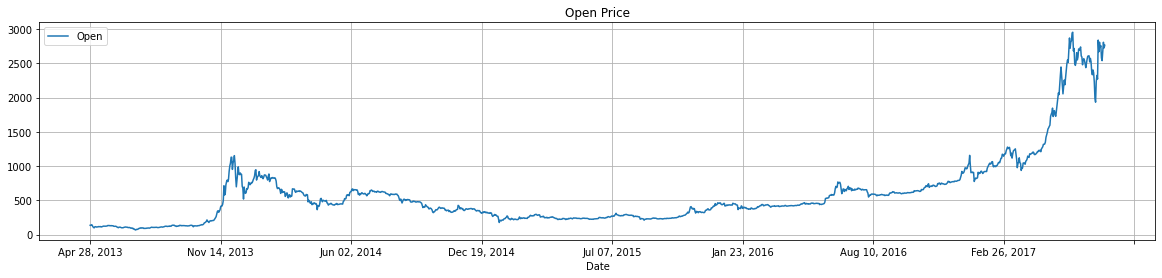

-------------------

Plot: Date v/s High


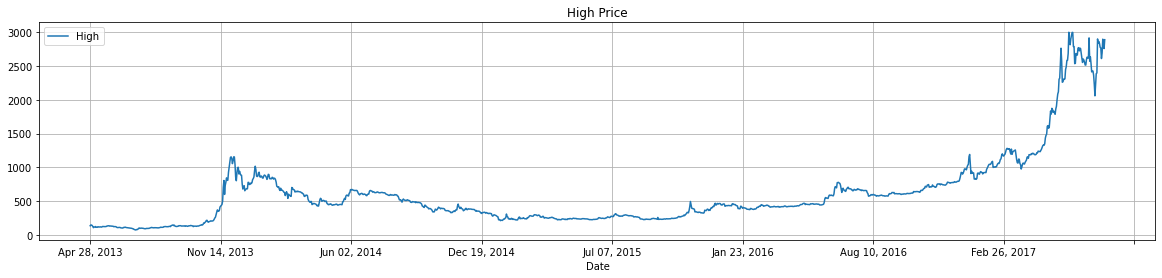

-------------------

Plot: Date v/s Low


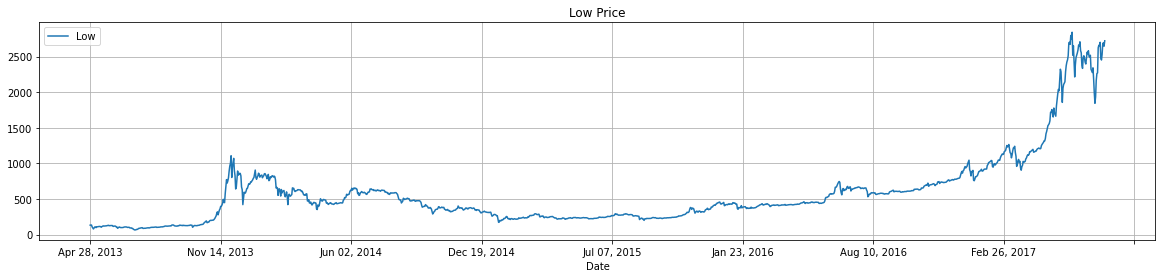

-------------------

Plot: Date v/s Close


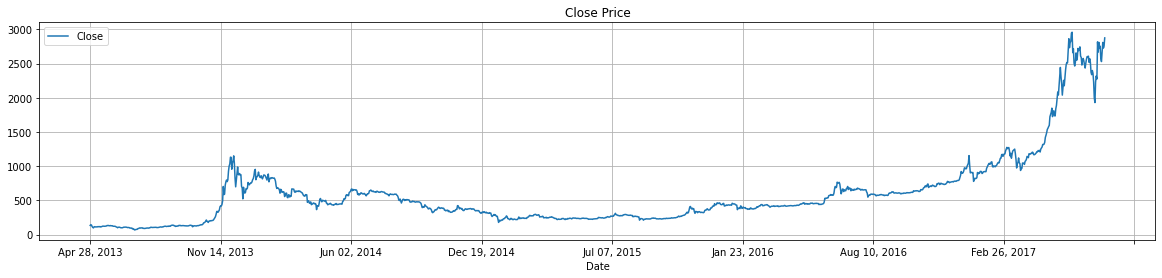

-------------------

Plot: Date v/s Volume


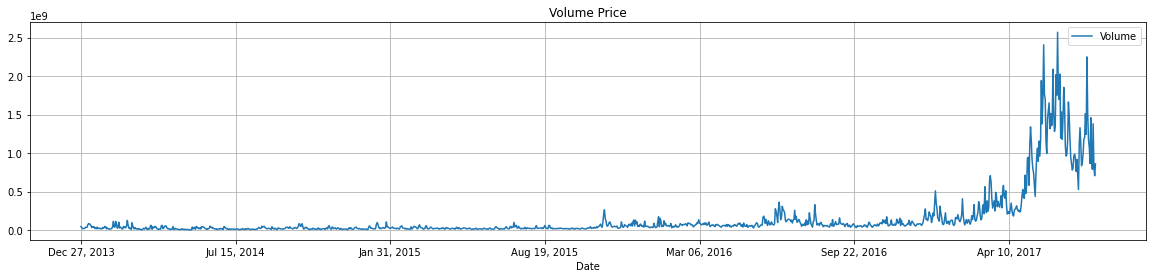

-------------------

Plot: Date v/s Market Cap


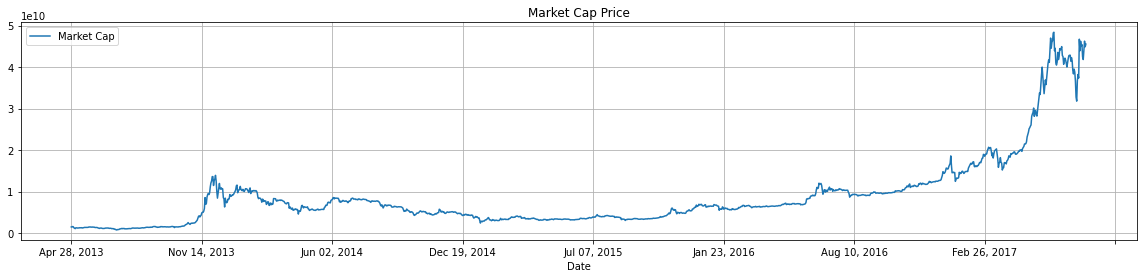

-------------------



In [9]:
for i in dataset.columns:
    if(i!='Date'):
        df = dataset[['Date', i]]
        if(i=='Volume'):
                df = df[df["Volume"].str.contains("-") == False]
                df['Volume'] = df['Volume'].str.replace(',', '').astype(float)
        df = df.set_index('Date')
        df.plot(figsize=(20, 4))
        plt.grid()
        plt.legend(loc='best')
        plt.title(f'{i} Price')
        print(f"Plot: Date v/s {i}")
        plt.show(block=False)        
        print("-------------------\n")

In [10]:
scaler = StandardScaler()
for feature in dataset.columns:
    if(feature == 'Date' or feature == 'Volume'):
       continue
    else:
       dataset[[feature]] = scaler.fit_transform(dataset[[feature]])
dataset

,Date,Open,High,Low,Close,Volume,Market Cap
1555,"Apr 28, 2013",-0.855357,-0.851137,-0.861654,-0.856000,-,-0.826451
1554,"Apr 29, 2013",-0.857001,-0.829933,-0.857897,-0.836351,-,-0.827526
1553,"Apr 30, 2013",-0.838721,-0.830965,-0.857799,-0.846889,-,-0.815277
1552,"May 01, 2013",-0.848282,-0.843934,-0.909863,-0.888754,-,-0.821591
1551,"May 02, 2013",-0.891535,-0.870260,-0.940395,-0.911161,-,-0.850385
...,...,...,...,...,...,...,...
4,"Jul 27, 2017",3.740344,3.860089,3.878646,3.970706,"789,104,000",3.805180
3,"Jul 28, 2017",4.009997,4.236145,4.176027,4.231730,"1,380,100,000",4.072617
2,"Jul 29, 2017",4.253395,4.072757,4.201871,4.074693,"803,746,000",4.314136
1,"Jul 30, 2017",4.095394,3.980221,4.107055,4.133145,"705,943,000",4.158354


In [11]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1556 entries, 1555 to 0
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Date        1556 non-null   object 
 1   Open        1556 non-null   float64
 2   High        1556 non-null   float64
 3   Low         1556 non-null   float64
 4   Close       1556 non-null   float64
 5   Volume      1556 non-null   object 
 6   Market Cap  1556 non-null   float64
dtypes: float64(5), object(2)
memory usage: 85.2+ KB


In [12]:
dataset.describe()

,Open,High,Low,Close,Market Cap
count,1.556000e+03,1.556000e+03,1.556000e+03,1.556000e+03,1.556000e+03
mean,-3.402020e-16,1.278612e-16,6.278896e-17,2.300359e-16,4.960328e-16
std,1.000321e+00,1.000321e+00,1.000321e+00,1.000321e+00,1.000321e+00
min,-9.830891e-01,-9.642873e-01,-9.932900e-01,-9.811197e-01,-9.093122e-01
25%,-6.278340e-01,-6.220596e-01,-6.308228e-01,-6.275388e-01,-5.854448e-01
50%,-2.753993e-01,-2.771329e-01,-2.714602e-01,-2.765353e-01,-2.651670e-01
75%,1.526135e-01,1.409904e-01,1.559843e-01,1.505759e-01,1.383742e-01
max,4.532953e+00,4.424900e+00,4.493992e+00,4.515333e+00,4.560503e+00


In [13]:
models = []
modelOpenMSE = []
modelHighMSE = []
modelLowHSE = []
modelCloseMSE = []
modelVolumeMSE = []
modelMarketCapMSE = []

##Bitcoin Price Prediction Using Support Vector Regression (SVR)

In [16]:
def pred_each_column_SVR(df, user_prediction_days):
    score_sum = 0
    score_list = []
    mse_list = []
    for i in df.columns:
        if(i!='Prediction' and i!='Date'):
            df_new = df.copy(deep = True)
            if(i=='Volume'):
                df_new = df_new[df_new["Volume"].str.contains("-") == False]
                df_new['Volume'] = df_new['Volume'].str.replace(',', '').astype(float)
                df_new[['Volume']] = StandardScaler().fit_transform(df_new[['Volume']])
            df_new.drop(df_new.columns.difference([i,'Prediction']), 1, inplace = True)
            prediction_days = user_prediction_days
            df_new['Prediction'] = df_new[[i]].shift(-prediction_days)
            print("---")
            X = np.array(df_new.drop(['Prediction'], axis = 1))
            X = X[:len(df_new)-prediction_days]
            Y = np.array(df_new['Prediction'])
            Y = Y[:-prediction_days]
            x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)
            prediction_days_array = np.array(df_new.drop(['Prediction'],1))[-prediction_days:]
            svr_rbf = SVR(kernel = 'rbf', C = 1e3, gamma = 0.00001)
            svr_rbf.fit(x_train, y_train)
            svr_rbf_confidence = svr_rbf.score(x_test, y_test)
            score_sum+=svr_rbf_confidence
            score_list.append(svr_rbf_confidence)
            print(i,":", "svr_(rbf) score: ", svr_rbf_confidence)
            y_pred = svr_rbf.predict(x_test)
            svr_rbf_mse = mean_squared_error(y_test, y_pred)
            print(i,":", "MSE", svr_rbf_mse)
            mse_list.append(svr_rbf_mse)
            plt.figure(figsize=(20,5)) 
            plt.plot(y_test, label="Actual Price", color='green')
            plt.plot(y_pred, label="Predicted Price", color='red')
            plt.title(f'Bitcoin price of {i} prediction for Model Linear Regression')
            plt.xlabel('Time [days]')
            plt.ylabel('Price')
            plt.legend(loc='best')
            plt.show();
    return score_sum, score_list, mse_list, y_test, y_pred

---
Open : svr_(rbf) score:  0.995487895767117
Open : MSE 0.003991938949013397


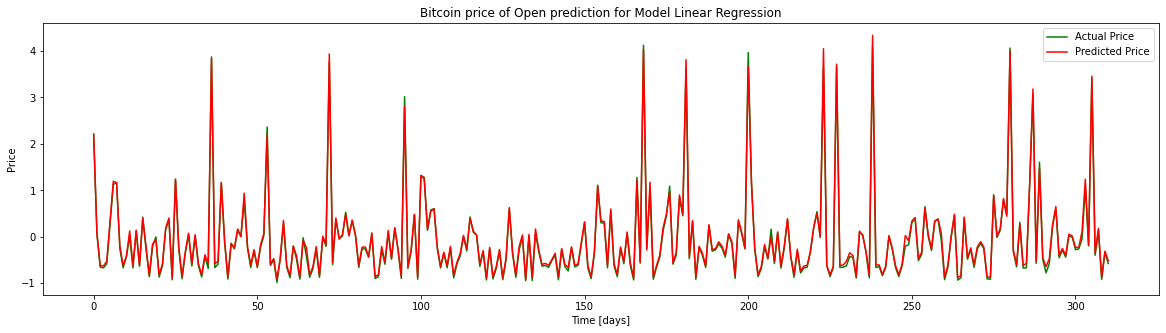

---
High : svr_(rbf) score:  0.9921389473392067
High : MSE 0.005654030623122243


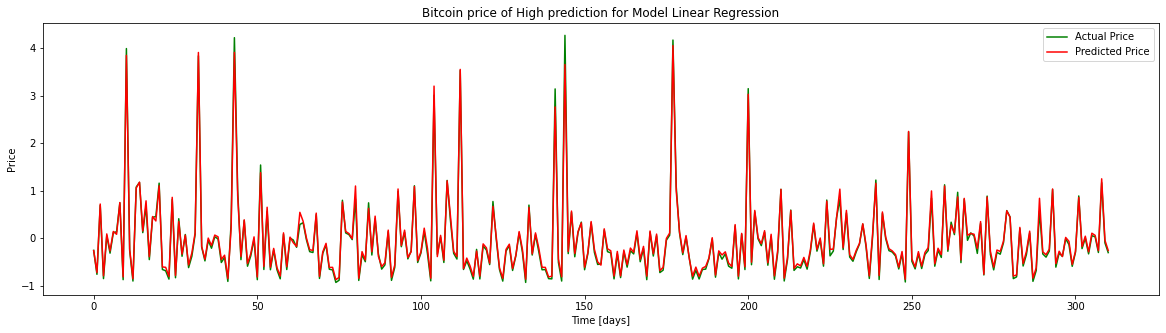

---
Low : svr_(rbf) score:  0.9947318428336966
Low : MSE 0.0062795469749040295


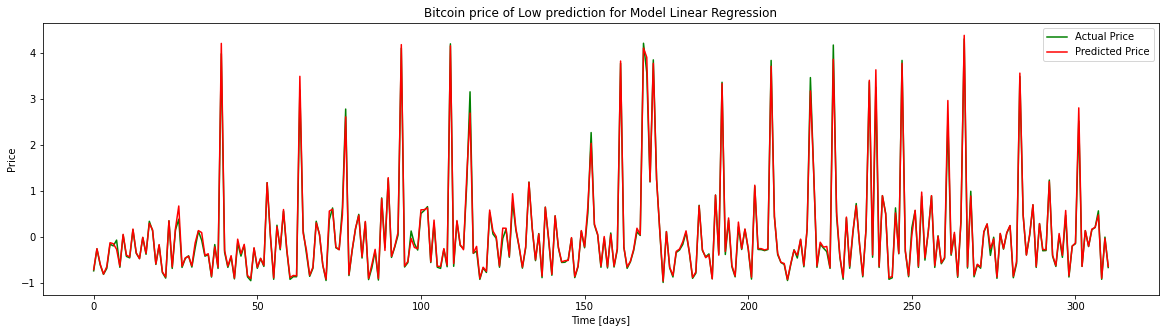

---
Close : svr_(rbf) score:  0.993047618953954
Close : MSE 0.008465283896701769


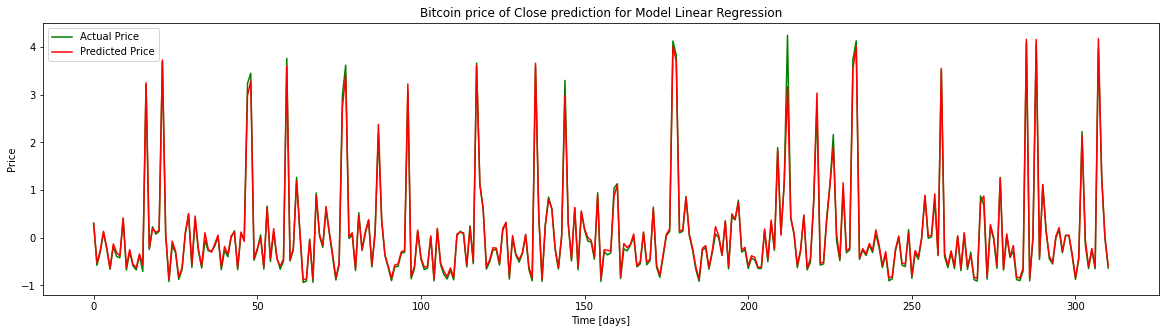

---
Volume : svr_(rbf) score:  0.871066770321441
Volume : MSE 0.11506984894835394


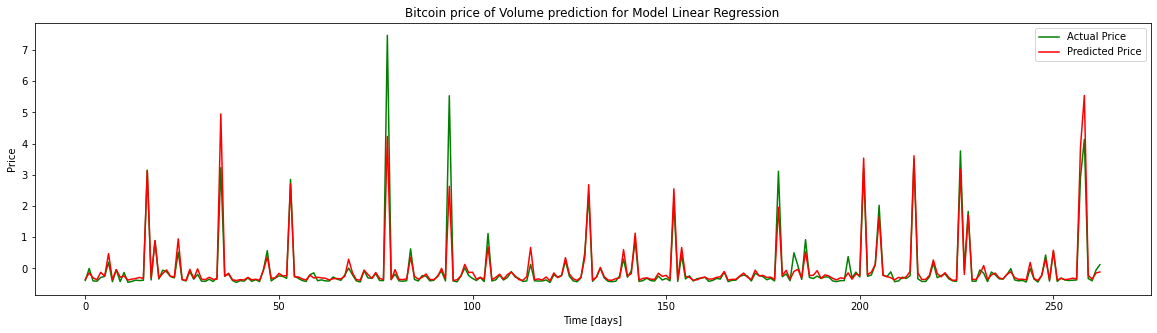

---
Market Cap : svr_(rbf) score:  0.9947753763007717
Market Cap : MSE 0.005003794356481371


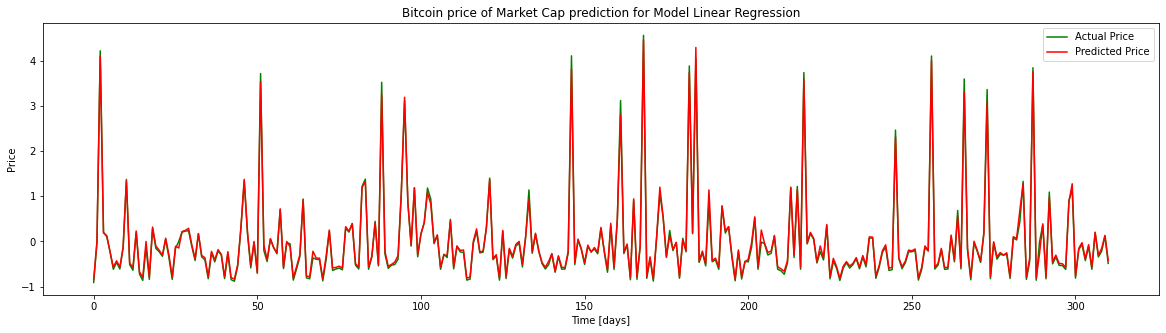

In [15]:
score, scoreList, mse_list, y_test, y_pred = pred_each_column_SVR(dataset, 1)
models.append('SVR (rbf)')
modelOpenMSE.append(mse_list[0])
modelHighMSE.append(mse_list[1])
modelLowHSE.append(mse_list[2])
modelCloseMSE.append(mse_list[3])
modelVolumeMSE.append(mse_list[4])
modelMarketCapMSE.append(mse_list[5])

###Checking the best value of prediction days

In [17]:
Dict = {}
Dict_open = {}
Dict_close = {}
Dict_high = {}
Dict_low = {}
Dict_market_cap = {}
Dict_volume = {}
for i in range(1, 31):
    value, values_list, mse_list, y_test, y_pred = pred_each_column_SVR(dataset, i)
    Dict[i] = value
    Dict_open[i] = values_list[0]
    Dict_high[i] = values_list[1]
    Dict_low[i] = values_list[2]
    Dict_close[i] = values_list[3]
    Dict_volume[i] = values_list[4]
    Dict_market_cap[i] = values_list[5]

---
Open : svr_(rbf) score:  0.9941692802906495
Open : MSE 0.0059026914053834515
---
High : svr_(rbf) score:  0.9946874226203085
High : MSE 0.005388492904721818
---
Low : svr_(rbf) score:  0.9913572242060431
Low : MSE 0.007889774834386949
---
Close : svr_(rbf) score:  0.9936974057293908
Close : MSE 0.007604720303476972
---
Volume : svr_(rbf) score:  0.900107789486541
Volume : MSE 0.05027377210368797
---
Market Cap : svr_(rbf) score:  0.9942433221892032
Market Cap : MSE 0.003835173340888319
---
Open : svr_(rbf) score:  0.9871905693771603
Open : MSE 0.01184636109403994
---
High : svr_(rbf) score:  0.9873508919452548
High : MSE 0.014726782745802332
---
Low : svr_(rbf) score:  0.9887331396256259
Low : MSE 0.01002207216119234
---
Close : svr_(rbf) score:  0.9887121243115689
Close : MSE 0.011269205384694624
---
Volume : svr_(rbf) score:  0.8116144129812624
Volume : MSE 0.21153345212460747
---
Market Cap : svr_(rbf) score:  0.9862818398521755
Market Cap : MSE 0.014260633173580218
---
Open : s

####open

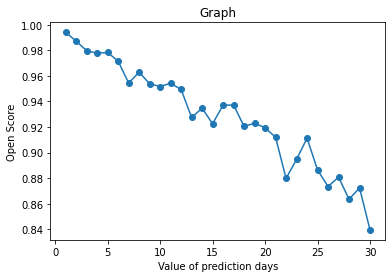

In [18]:
myList = Dict_open.items()
myList = sorted(myList) 
x, y = zip(*myList) 

plt.scatter(x, y)
plt.plot(x, y)
plt.title("Graph")
plt.xlabel("Value of prediction days")
plt.ylabel("Open Score")
plt.show()

####high

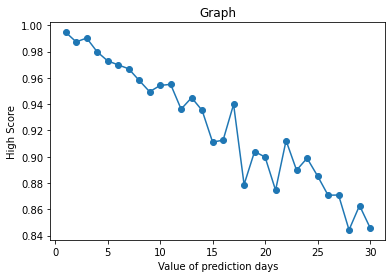

In [19]:
myList = Dict_high.items()
myList = sorted(myList) 
x, y = zip(*myList) 

plt.scatter(x, y)
plt.plot(x, y)
plt.title("Graph")
plt.xlabel("Value of prediction days")
plt.ylabel("High Score")
plt.show()

####low

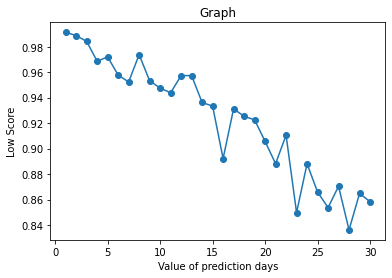

In [20]:
myList = Dict_low.items()
myList = sorted(myList) 
x, y = zip(*myList) 

plt.scatter(x, y)
plt.plot(x, y)
plt.title("Graph")
plt.xlabel("Value of prediction days")
plt.ylabel("Low Score")
plt.show()

####close

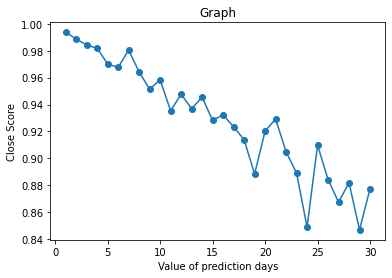

In [21]:
myList = Dict_close.items()
myList = sorted(myList) 
x, y = zip(*myList) 

plt.scatter(x, y)
plt.plot(x, y)
plt.title("Graph")
plt.xlabel("Value of prediction days")
plt.ylabel("Close Score")
plt.show()

####volume

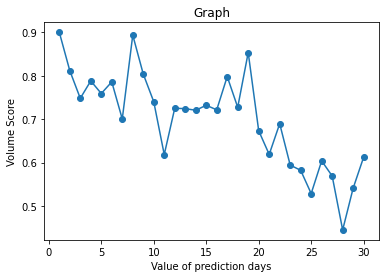

In [22]:
myList = Dict_volume.items()
myList = sorted(myList) 
x, y = zip(*myList) 

plt.scatter(x, y)
plt.plot(x, y)
plt.title("Graph")
plt.xlabel("Value of prediction days")
plt.ylabel("Volume Score")
plt.show()

####market cap

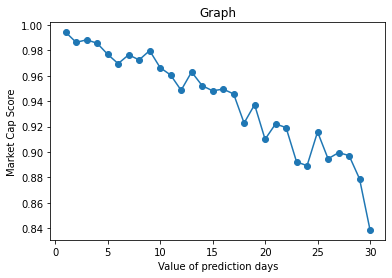

In [23]:
myList = Dict_market_cap.items()
myList = sorted(myList) 
x, y = zip(*myList) 

plt.scatter(x, y)
plt.plot(x, y)
plt.title("Graph")
plt.xlabel("Value of prediction days")
plt.ylabel("Market Cap Score")
plt.show()

##Bitcoin Price Prediction Using Linear Regression (LR)

In [27]:
def pred_each_column_LR(df, user_prediction_days):
    score_sum = 0
    score_list = []
    mse_list = []
    for i in df.columns:
        if(i!='Prediction' and i!='Date'):
            df_new = df.copy(deep = True)
            if(i=='Volume'):
                df_new = df_new[df_new["Volume"].str.contains("-") == False]
                df_new['Volume'] = df_new['Volume'].str.replace(',', '').astype(float)
                df_new[['Volume']] = StandardScaler().fit_transform(df_new[['Volume']])
            df_new.drop(df_new.columns.difference([i,'Prediction']), 1, inplace = True)
            prediction_days = user_prediction_days
            df_new['Prediction'] = df_new[[i]].shift(-prediction_days)
            print("---")
            X = np.array(df_new.drop(['Prediction'], axis = 1))
            X = X[:len(df_new)-prediction_days]
            Y = np.array(df_new['Prediction'])
            Y = Y[:-prediction_days]
            x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)
            prediction_days_array = np.array(df_new.drop(['Prediction'],1))[-prediction_days:]
            lr = LR()
            lr.fit(x_train, y_train)
            lr_score = lr.score(x_test, y_test)
            score_sum += lr_score
            score_list.append(lr_score)
            print(i,":", "LR score: ", lr_score)
            y_pred = lr.predict(x_test)
            mse_score = mean_squared_error(y_test, y_pred)
            print(i,":", "MSE", mse_score)
            mse_list.append(mse_score)
            plt.figure(figsize=(20,5)) 
            plt.plot(y_test, label="Actual Price", color='green')
            plt.plot(y_pred, label="Predicted Price", color='red')
            plt.title(f'Bitcoin price of {i} prediction for Model Linear Regression')
            plt.xlabel('Time [days]')
            plt.ylabel('Price')
            plt.legend(loc='best')
            plt.show();
    return score_sum, score_list, mse_list, y_test, y_pred

---
Open : LR score:  0.9953858334888294
Open : MSE 0.004726615984906088


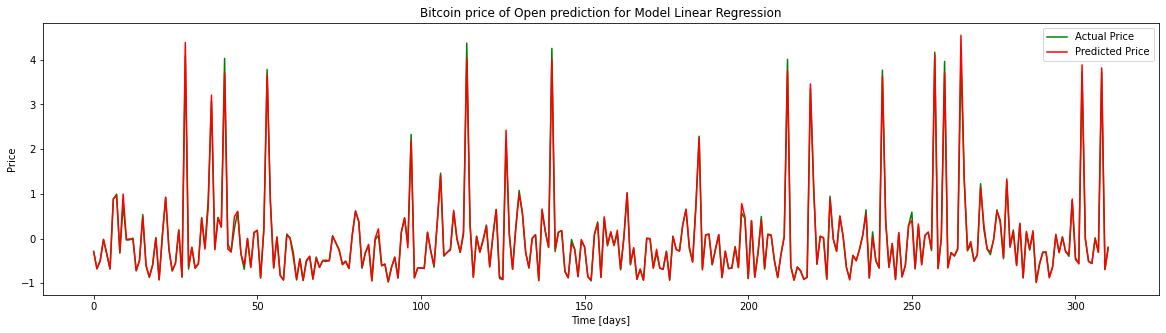

---
High : LR score:  0.9957266154513897
High : MSE 0.0038607051530930767


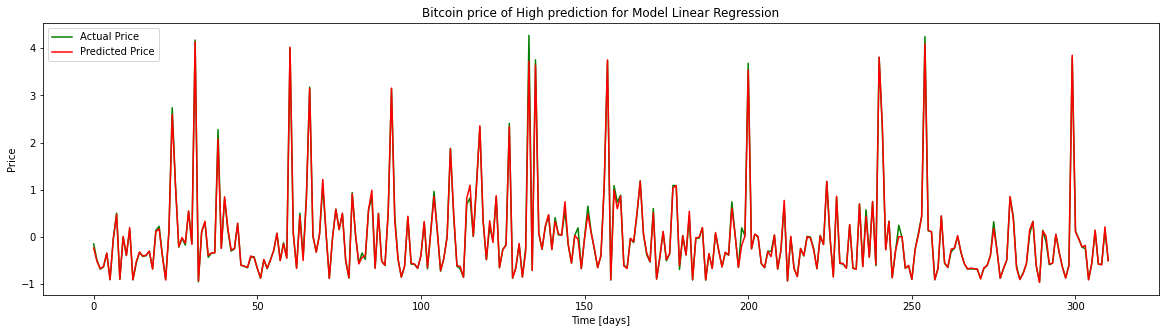

---
Low : LR score:  0.9955520282267593
Low : MSE 0.004058323895597799


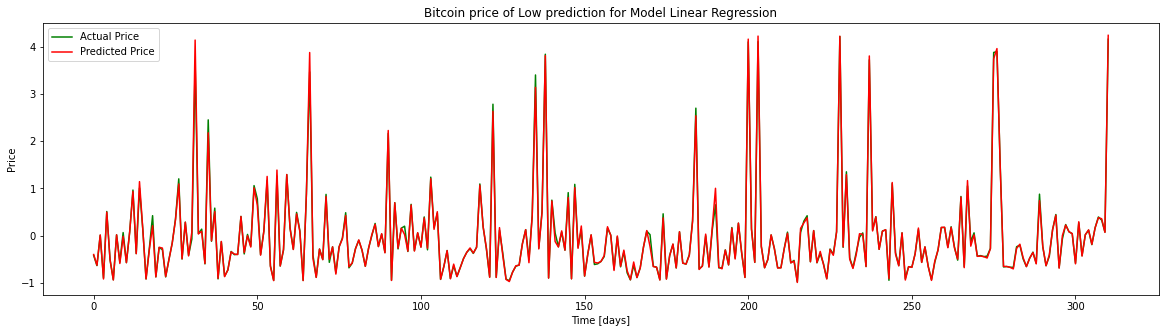

---
Close : LR score:  0.9954869885866252
Close : MSE 0.004911306386439224


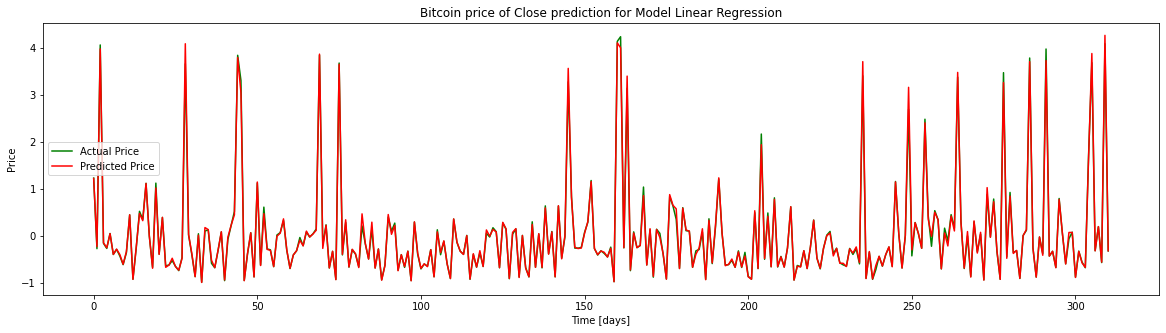

---
Volume : LR score:  0.9052969386349232
Volume : MSE 0.08503013696340261


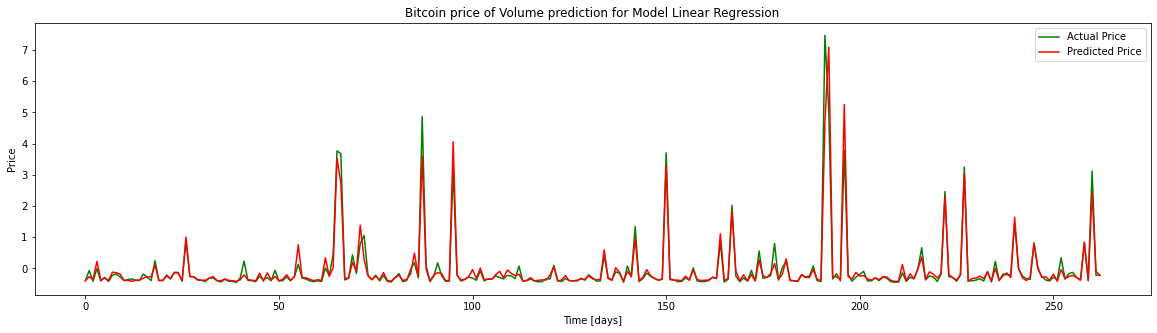

---
Market Cap : LR score:  0.9927752353863657
Market Cap : MSE 0.008789138706905845


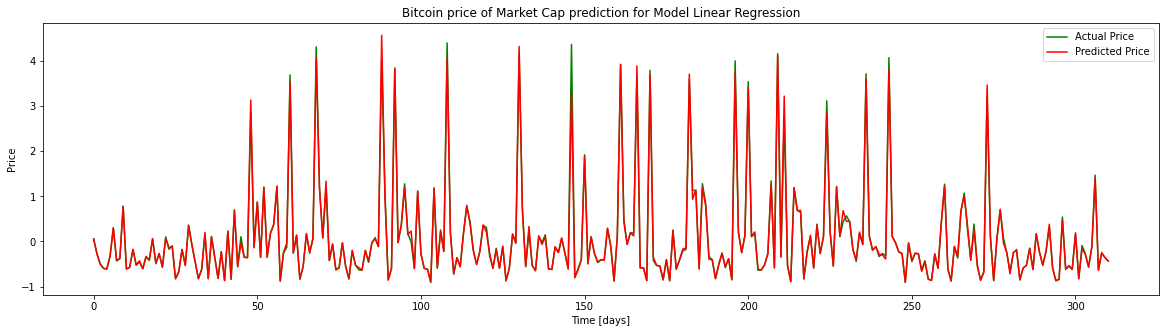

In [25]:
score, scoreList, mse_list, y_test, y_pred = pred_each_column_LR(dataset, 1)
models.append('LR')
modelOpenMSE.append(mse_list[0])
modelHighMSE.append(mse_list[1])
modelLowHSE.append(mse_list[2])
modelCloseMSE.append(mse_list[3])
modelVolumeMSE.append(mse_list[4])
modelMarketCapMSE.append(mse_list[5])

###Checking the best value of prediction days

In [28]:
Dict = {}
Dict_open = {}
Dict_close = {}
Dict_high = {}
Dict_low = {}
Dict_market_cap = {}
Dict_volume = {}
for i in range(1, 31):
    value, values_list, mse_list, y_test, y_pred = pred_each_column_LR(dataset, i)
    Dict[i] = value
    Dict_open[i] = values_list[0]
    Dict_high[i] = values_list[1]
    Dict_low[i] = values_list[2]
    Dict_close[i] = values_list[3]
    Dict_volume[i] = values_list[4]
    Dict_market_cap[i] = values_list[5]

---
Open : LR score:  0.9943335847778274
Open : MSE 0.00474369656137805
---
High : LR score:  0.995959063106277
High : MSE 0.0037885511454765746
---
Low : LR score:  0.9928317886361637
Low : MSE 0.005477130385604197
---
Close : LR score:  0.9924007638253605
Close : MSE 0.00711784296462987
---
Volume : LR score:  0.8730092506463643
Volume : MSE 0.07680142163636329
---
Market Cap : LR score:  0.9968270243675545
Market Cap : MSE 0.0031857694875335307
---
Open : LR score:  0.9915445352657601
Open : MSE 0.008081197367115826
---
High : LR score:  0.9872588638565546
High : MSE 0.01167978421258409
---
Low : LR score:  0.9884760269579492
Low : MSE 0.014384320185865747
---
Close : LR score:  0.9915204136510352
Close : MSE 0.008668582887829878
---
Volume : LR score:  0.7838606685939087
Volume : MSE 0.205357893368251
---
Market Cap : LR score:  0.9933279712742705
Market Cap : MSE 0.00553175570323034
---
Open : LR score:  0.9879398375588145
Open : MSE 0.0142327208133273
---
High : LR score:  0.9835

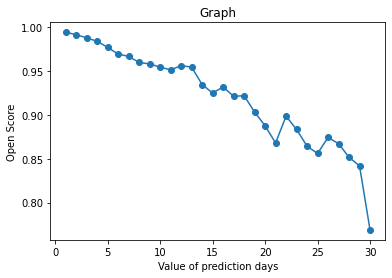

In [29]:
myList = Dict_open.items()
myList = sorted(myList) 
x, y = zip(*myList) 

plt.scatter(x, y)
plt.plot(x, y)
plt.title("Graph")
plt.xlabel("Value of prediction days")
plt.ylabel("Open Score")
plt.show()

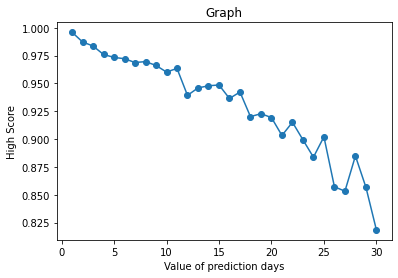

In [30]:
myList = Dict_high.items()
myList = sorted(myList) 
x, y = zip(*myList) 

plt.scatter(x, y)
plt.plot(x, y)
plt.title("Graph")
plt.xlabel("Value of prediction days")
plt.ylabel("High Score")
plt.show()

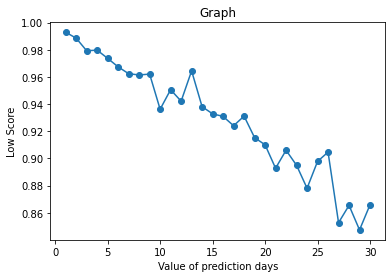

In [31]:
myList = Dict_low.items()
myList = sorted(myList) 
x, y = zip(*myList) 

plt.scatter(x, y)
plt.plot(x, y)
plt.title("Graph")
plt.xlabel("Value of prediction days")
plt.ylabel("Low Score")
plt.show()

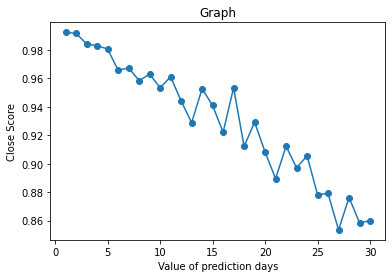

In [32]:
myList = Dict_close.items()
myList = sorted(myList) 
x, y = zip(*myList) 

plt.scatter(x, y)
plt.plot(x, y)
plt.title("Graph")
plt.xlabel("Value of prediction days")
plt.ylabel("Close Score")
plt.show()

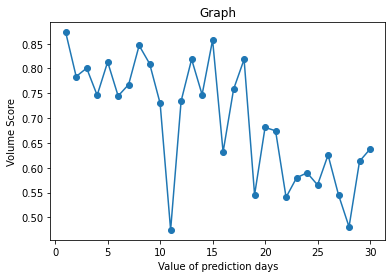

In [33]:
myList = Dict_volume.items()
myList = sorted(myList) 
x, y = zip(*myList) 

plt.scatter(x, y)
plt.plot(x, y)
plt.title("Graph")
plt.xlabel("Value of prediction days")
plt.ylabel("Volume Score")
plt.show()

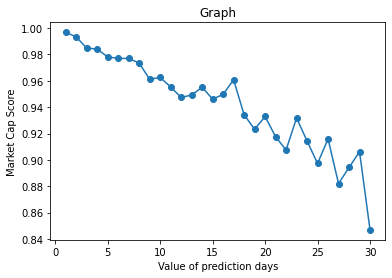

In [34]:
myList = Dict_market_cap.items()
myList = sorted(myList) 
x, y = zip(*myList) 

plt.scatter(x, y)
plt.plot(x, y)
plt.title("Graph")
plt.xlabel("Value of prediction days")
plt.ylabel("Market Cap Score")
plt.show()

##Bitcoin Price Prediction Using Random Forest Regressor (RFR)

In [37]:
def pred_each_column_RFR(df, user_prediction_days):
    score_sum = 0
    score_list = []
    mse_list = []
    for i in df.columns:
        if(i!='Prediction' and i!='Date'):
            df_new = df.copy(deep = True)
            if(i=='Volume'):
                df_new = df_new[df_new["Volume"].str.contains("-") == False]
                df_new['Volume'] = df_new['Volume'].str.replace(',', '').astype(float)
                df_new[['Volume']] = StandardScaler().fit_transform(df_new[['Volume']])
            df_new.drop(df_new.columns.difference([i,'Prediction']), 1, inplace = True)
            prediction_days = user_prediction_days
            df_new['Prediction'] = df_new[[i]].shift(-prediction_days)
            print("---")
            X = np.array(df_new.drop(['Prediction'], axis = 1))
            X = X[:len(df_new)-prediction_days]
            Y = np.array(df_new['Prediction'])
            Y = Y[:-prediction_days]
            x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)
            prediction_days_array = np.array(df_new.drop(['Prediction'],1))[-prediction_days:]
            random_forest = RFR()
            random_forest.fit(x_train, y_train)
            random_forest_score = random_forest.score(x_test, y_test)
            score_sum += random_forest_score
            score_list.append(random_forest_score)
            print(i,":", "RFR score: ", random_forest_score)
            y_pred = random_forest.predict(x_test)
            mse_score = mean_squared_error(y_test, y_pred)
            mse_list.append(mse_score)
            print(i,":", "MSE", mse_score)
            plt.figure(figsize=(20,5)) 
            plt.plot(y_test, label="Actual Price", color='green')
            plt.plot(y_pred, label="Predicted Price", color='red')
            plt.title(f'Bitcoin price of {i} prediction for Model Linear Regression')
            plt.xlabel('Time [days]')
            plt.ylabel('Price')
            plt.legend(loc='best')
            plt.show();
    return score_sum, score_list, mse_list, y_test, y_pred

---
Open : RFR score:  0.9918864873624623
Open : MSE 0.008875248739896533


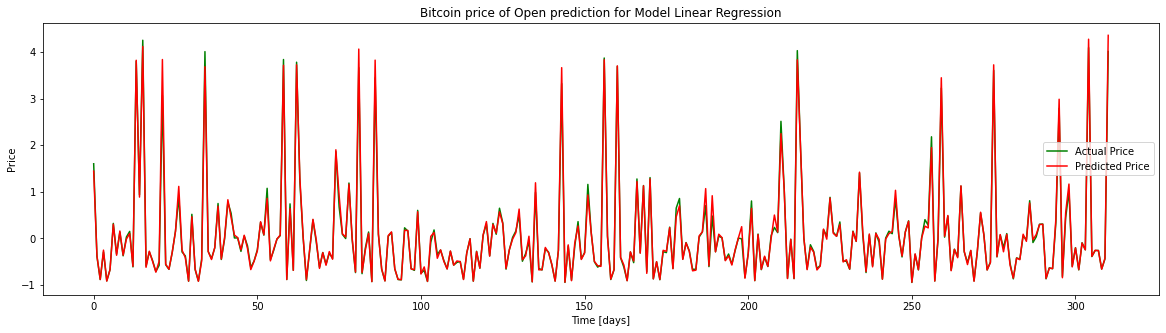

---
High : RFR score:  0.992520040140091
High : MSE 0.007443714343061476


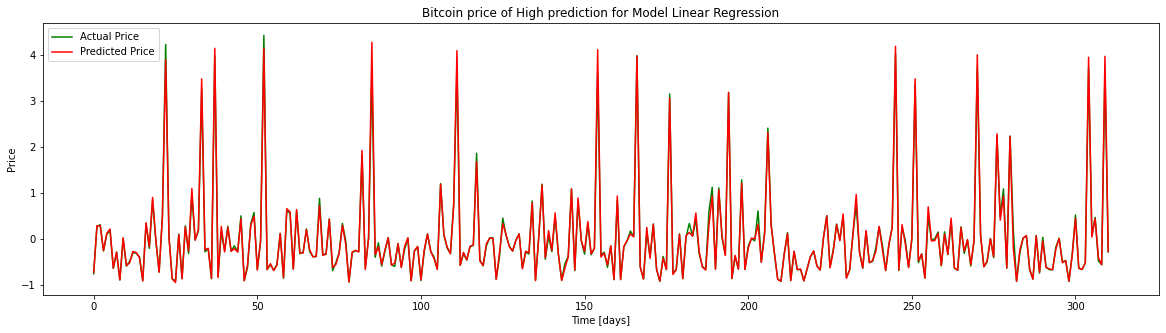

---
Low : RFR score:  0.992001164388641
Low : MSE 0.007405471010083741


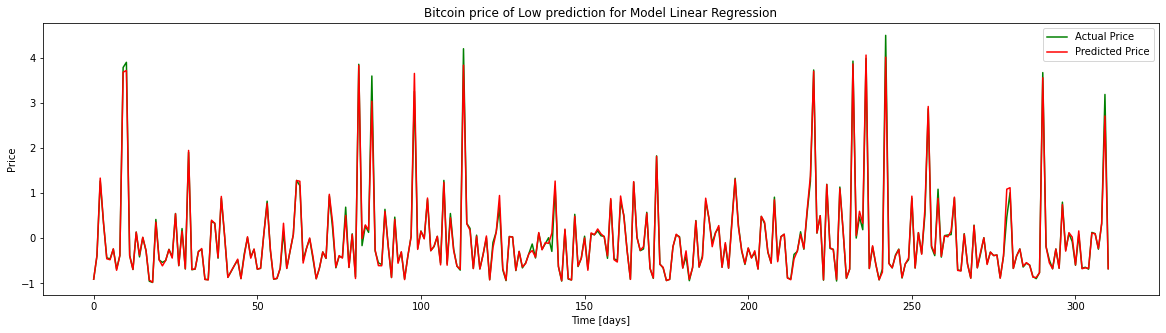

---
Close : RFR score:  0.9927840076102267
Close : MSE 0.0055164804206287235


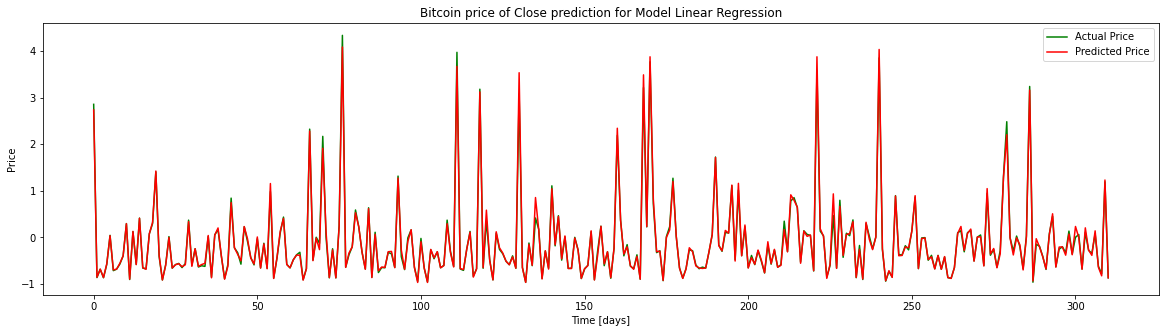

---
Volume : RFR score:  0.8517099128217617
Volume : MSE 0.1366375463477373


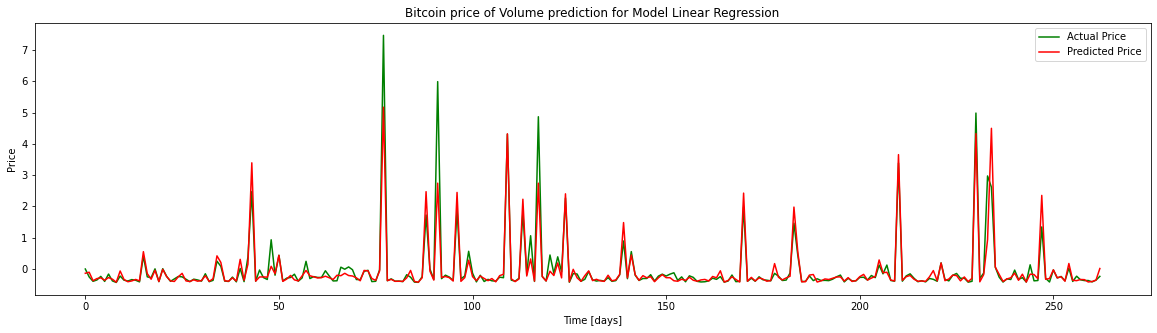

---
Market Cap : RFR score:  0.9928328579808083
Market Cap : MSE 0.007486855317528909


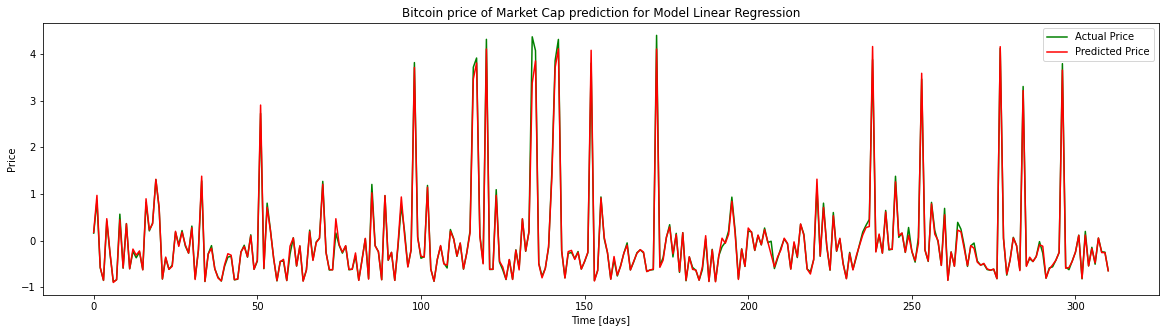

In [36]:
score, scoreList, mse_list, y_test, y_pred = pred_each_column_RFR(dataset, 1)
models.append('RFR')
modelOpenMSE.append(mse_list[0])
modelHighMSE.append(mse_list[1])
modelLowHSE.append(mse_list[2])
modelCloseMSE.append(mse_list[3])
modelVolumeMSE.append(mse_list[4])
modelMarketCapMSE.append(mse_list[5])

###Checking the best value of prediction days

In [38]:
Dict = {}
Dict_open = {}
Dict_close = {}
Dict_high = {}
Dict_low = {}
Dict_market_cap = {}
Dict_volume = {}
for i in range(1, 31):
    value, values_list, mse_list, y_test, y_pred = pred_each_column_RFR(dataset, i)
    Dict[i] = value
    Dict_open[i] = values_list[0]
    Dict_high[i] = values_list[1]
    Dict_low[i] = values_list[2]
    Dict_close[i] = values_list[3]
    Dict_volume[i] = values_list[4]
    Dict_market_cap[i] = values_list[5]

---
Open : RFR score:  0.9931909745053884
Open : MSE 0.00808391887413282
---
High : RFR score:  0.9944585773487121
High : MSE 0.0069111553565308495
---
Low : RFR score:  0.9903979153235694
Low : MSE 0.007084212636155103
---
Close : RFR score:  0.9944460258176483
Close : MSE 0.006678994961220731
---
Volume : RFR score:  0.8880058036402112
Volume : MSE 0.12887028948043755
---
Market Cap : RFR score:  0.9952326982916461
Market Cap : MSE 0.0043280583922513495
---
Open : RFR score:  0.9831516824379919
Open : MSE 0.014394417048671693
---
High : RFR score:  0.9914528543559041
High : MSE 0.007859078949369894
---
Low : RFR score:  0.9864424273094481
Low : MSE 0.011881117704579355
---
Close : RFR score:  0.9893520452922089
Close : MSE 0.010716395895600587
---
Volume : RFR score:  0.7336042368202444
Volume : MSE 0.2185880310269689
---
Market Cap : RFR score:  0.9921581766425555
Market Cap : MSE 0.008893450607017383
---
Open : RFR score:  0.9907504252905606
Open : MSE 0.010369835727294953
---
High

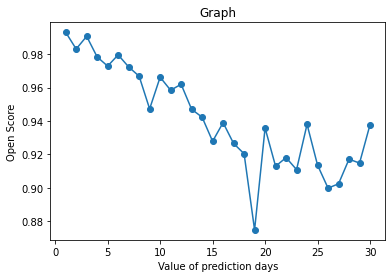

In [39]:
myList = Dict_open.items()
myList = sorted(myList) 
x, y = zip(*myList) 

plt.scatter(x, y)
plt.plot(x, y)
plt.title("Graph")
plt.xlabel("Value of prediction days")
plt.ylabel("Open Score")
plt.show()

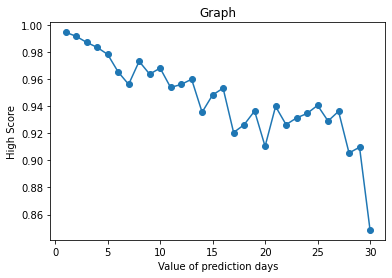

In [40]:
myList = Dict_high.items()
myList = sorted(myList) 
x, y = zip(*myList) 

plt.scatter(x, y)
plt.plot(x, y)
plt.title("Graph")
plt.xlabel("Value of prediction days")
plt.ylabel("High Score")
plt.show()

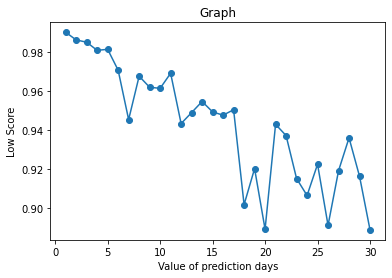

In [41]:
myList = Dict_low.items()
myList = sorted(myList) 
x, y = zip(*myList) 

plt.scatter(x, y)
plt.plot(x, y)
plt.title("Graph")
plt.xlabel("Value of prediction days")
plt.ylabel("Low Score")
plt.show()

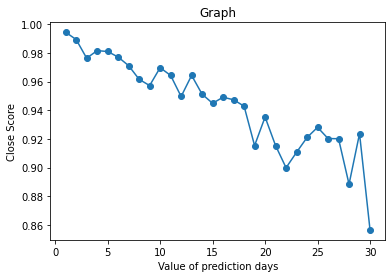

In [42]:
myList = Dict_close.items()
myList = sorted(myList) 
x, y = zip(*myList) 

plt.scatter(x, y)
plt.plot(x, y)
plt.title("Graph")
plt.xlabel("Value of prediction days")
plt.ylabel("Close Score")
plt.show()

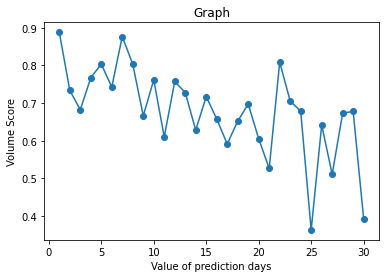

In [43]:
myList = Dict_volume.items()
myList = sorted(myList) 
x, y = zip(*myList) 

plt.scatter(x, y)
plt.plot(x, y)
plt.title("Graph")
plt.xlabel("Value of prediction days")
plt.ylabel("Volume Score")
plt.show()

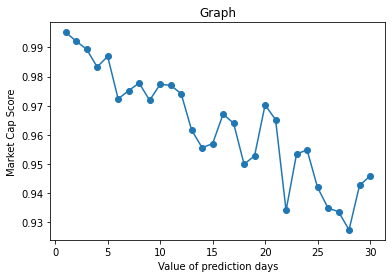

In [44]:
myList = Dict_market_cap.items()
myList = sorted(myList) 
x, y = zip(*myList) 

plt.scatter(x, y)
plt.plot(x, y)
plt.title("Graph")
plt.xlabel("Value of prediction days")
plt.ylabel("Market Cap Score")
plt.show()

##Bitcoin Price Prediction Using XGBoost regression (XGB)

In [48]:
def pred_each_column_XGB(df, user_prediction_days):
    score_sum = 0
    score_list = []
    mse_list = []
    for i in df.columns:
        if(i!='Prediction' and i!='Date'):
            df_new = df.copy(deep = True)
            if(i=='Volume'):
                df_new = df_new[df_new["Volume"].str.contains("-") == False]
                df_new['Volume'] = df_new['Volume'].str.replace(',', '').astype(float)
                df_new[['Volume']] = StandardScaler().fit_transform(df_new[['Volume']])
            df_new.drop(df_new.columns.difference([i,'Prediction']), 1, inplace = True)
            prediction_days = user_prediction_days
            df_new['Prediction'] = df_new[[i]].shift(-prediction_days)
            print("---")
            X = np.array(df_new.drop(['Prediction'], axis = 1))
            X = X[:len(df_new)-prediction_days]
            Y = np.array(df_new['Prediction'])
            Y = Y[:-prediction_days]
            x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)
            prediction_days_array = np.array(df_new.drop(['Prediction'],1))[-prediction_days:]
            xgb = XGBRegressor()
            xgb.fit(x_train, y_train)
            xgb_score = xgb.score(x_test, y_test)
            score_sum += xgb_score
            score_list.append(xgb_score)
            print(i,":", "XGB score: ", xgb_score)
            y_pred = xgb.predict(x_test)
            mse_score = mean_squared_error(y_test, y_pred)
            mse_list.append(mse_score)
            print(i,":", "MSE", mse_score)
            plt.figure(figsize=(20,5)) 
            plt.plot(y_test, label="Actual Price", color='green')
            plt.plot(y_pred, label="Predicted Price", color='red')
            plt.title(f'Bitcoin price of {i} prediction for Model Linear Regression')
            plt.xlabel('Time [days]')
            plt.ylabel('Price')
            plt.legend(loc='best')
            plt.show();
    return score_sum, score_list, mse_list, y_test, y_pred

---
[18:00:38] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Open : XGB score:  0.9900721341770324
Open : MSE 0.009457934739613138


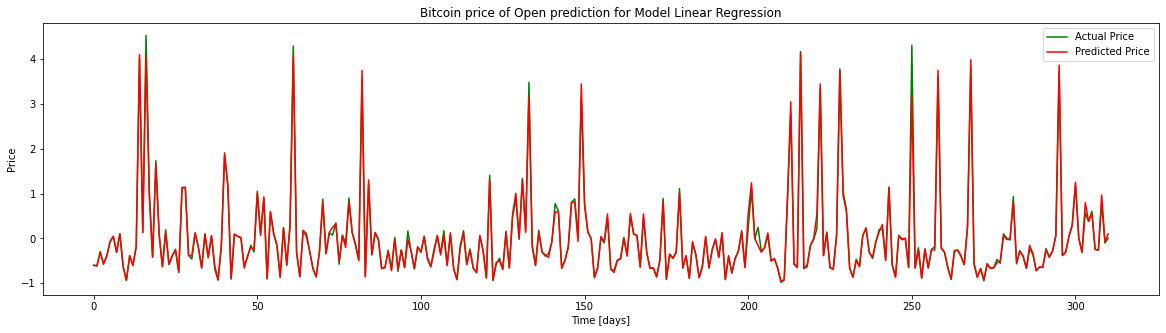

---
[18:00:38] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
High : XGB score:  0.992745290769707
High : MSE 0.007636116966543714


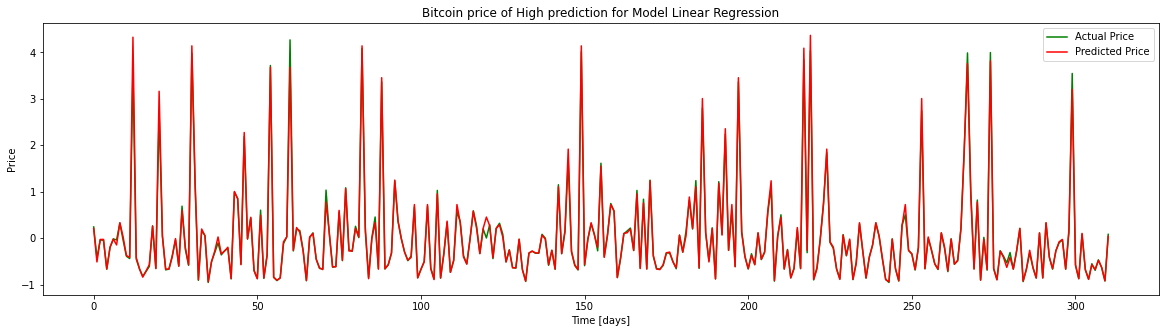

---
[18:00:38] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Low : XGB score:  0.9941532832098356
Low : MSE 0.004347334855341632


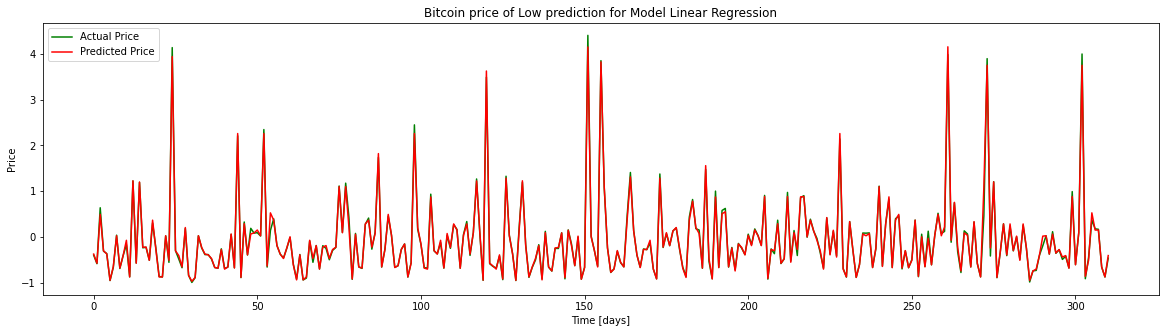

---
[18:00:39] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Close : XGB score:  0.9895316395149544
Close : MSE 0.009835671609528213


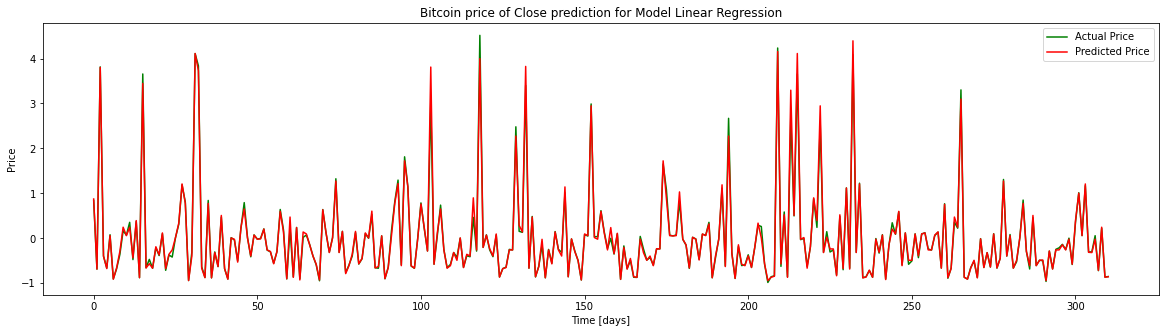

---
[18:00:39] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Volume : XGB score:  0.8865722062659115
Volume : MSE 0.1340799692488653


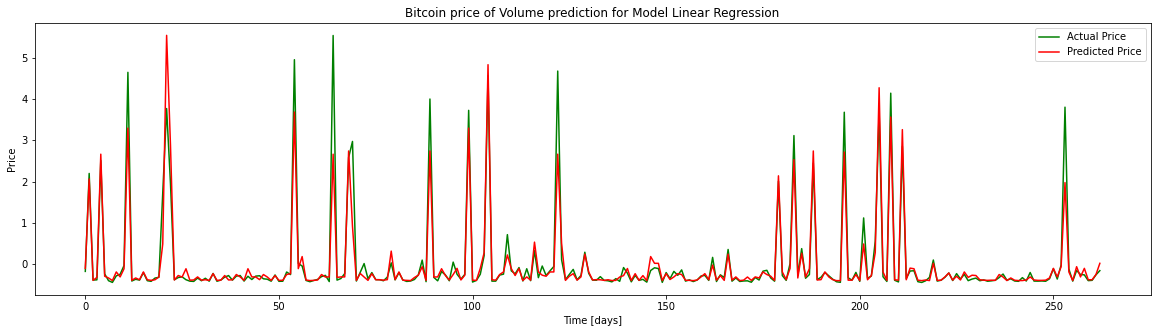

---
[18:00:39] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Market Cap : XGB score:  0.9963676255092404
Market Cap : MSE 0.003689420569660133


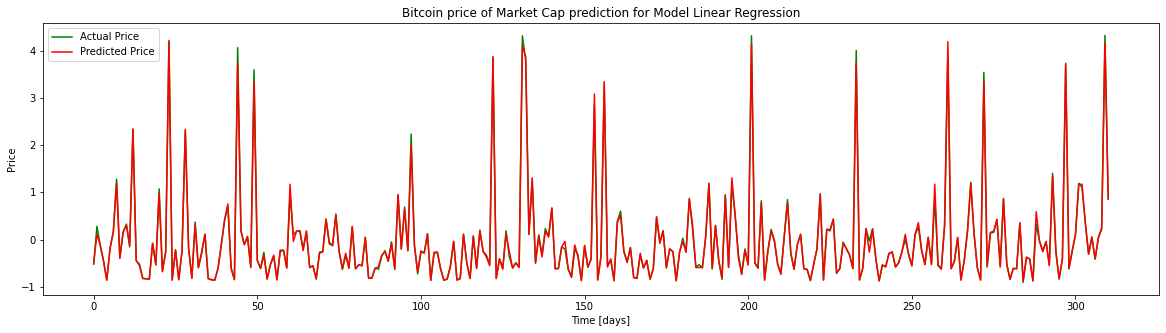

In [46]:
acc, accList, mse_list, y_test, y_pred = pred_each_column_XGB(dataset, 1)
models.append('XGB')
modelOpenMSE.append(mse_list[0])
modelHighMSE.append(mse_list[1])
modelLowHSE.append(mse_list[2])
modelCloseMSE.append(mse_list[3])
modelVolumeMSE.append(mse_list[4])
modelMarketCapMSE.append(mse_list[5])

###Checking the best value of prediction days

In [49]:
Dict = {}
Dict_open = {}
Dict_close = {}
Dict_high = {}
Dict_low = {}
Dict_market_cap = {}
Dict_volume = {}
for i in range(1, 31):
    value, values_list, mse_list, y_test, y_pred = pred_each_column_XGB(dataset, i)
    Dict[i] = value
    Dict_open[i] = values_list[0]
    Dict_high[i] = values_list[1]
    Dict_low[i] = values_list[2]
    Dict_close[i] = values_list[3]
    Dict_volume[i] = values_list[4]
    Dict_market_cap[i] = values_list[5]

---
[18:01:05] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Open : XGB score:  0.9931128718615619
Open : MSE 0.006265774933829622
---
[18:01:05] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
High : XGB score:  0.9948718842354527
High : MSE 0.00399842989721552
---
[18:01:05] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Low : XGB score:  0.9907430871227167
Low : MSE 0.00846853875917543
---
[18:01:05] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Close : XGB score:  0.9920776065928949
Close : MSE 0.005563924364433922
---
[18:01:05] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Volume : XGB score:  0.860328901834037
Volume : MSE 0.2118354982449

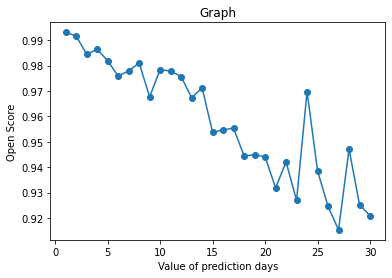

In [50]:
myList = Dict_open.items()
myList = sorted(myList) 
x, y = zip(*myList) 

plt.scatter(x, y)
plt.plot(x, y)
plt.title("Graph")
plt.xlabel("Value of prediction days")
plt.ylabel("Open Score")
plt.show()

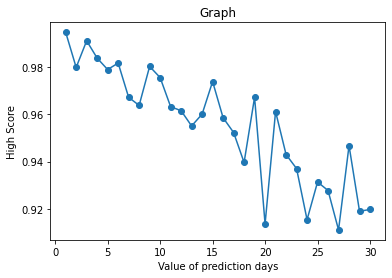

In [51]:
myList = Dict_high.items()
myList = sorted(myList) 
x, y = zip(*myList) 

plt.scatter(x, y)
plt.plot(x, y)
plt.title("Graph")
plt.xlabel("Value of prediction days")
plt.ylabel("High Score")
plt.show()

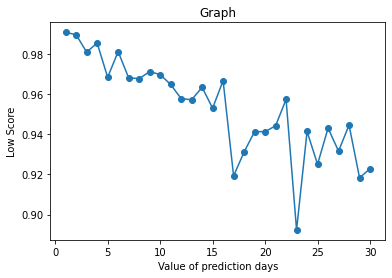

In [52]:
myList = Dict_low.items()
myList = sorted(myList) 
x, y = zip(*myList) 

plt.scatter(x, y)
plt.plot(x, y)
plt.title("Graph")
plt.xlabel("Value of prediction days")
plt.ylabel("Low Score")
plt.show()

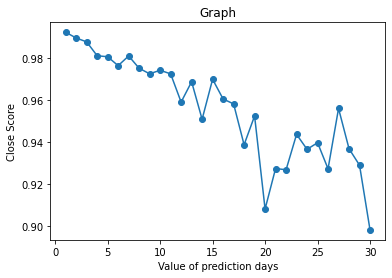

In [53]:
myList = Dict_close.items()
myList = sorted(myList) 
x, y = zip(*myList) 

plt.scatter(x, y)
plt.plot(x, y)
plt.title("Graph")
plt.xlabel("Value of prediction days")
plt.ylabel("Close Score")
plt.show()

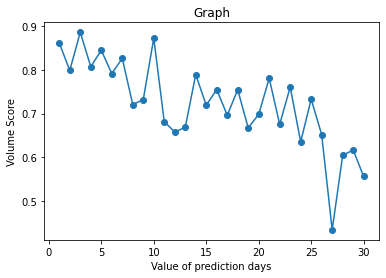

In [54]:
myList = Dict_volume.items()
myList = sorted(myList) 
x, y = zip(*myList) 

plt.scatter(x, y)
plt.plot(x, y)
plt.title("Graph")
plt.xlabel("Value of prediction days")
plt.ylabel("Volume Score")
plt.show()

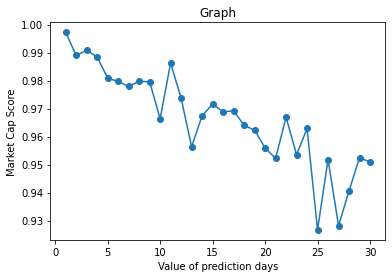

In [55]:
myList = Dict_market_cap.items()
myList = sorted(myList) 
x, y = zip(*myList) 

plt.scatter(x, y)
plt.plot(x, y)
plt.title("Graph")
plt.xlabel("Value of prediction days")
plt.ylabel("Market Cap Score")
plt.show()

##Plot Comparison

In [56]:
DictOpen = {}
DictOpen[models[0]] = modelOpenMSE[0]
DictOpen[models[1]] = modelOpenMSE[1]
DictOpen[models[2]] = modelOpenMSE[2]
DictOpen[models[3]] = modelOpenMSE[3]

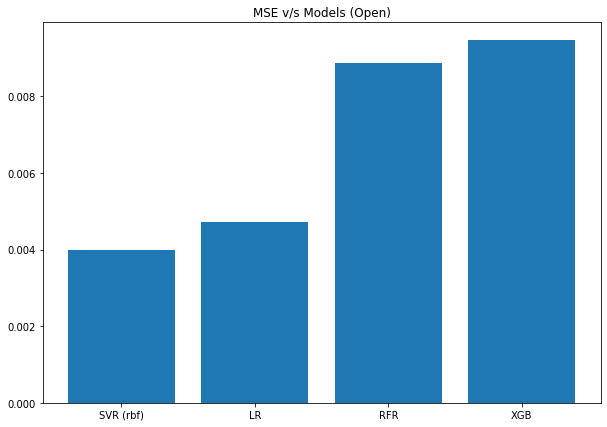

In [57]:
plt.figure(figsize=(10, 7))
plt.bar(range(len(DictOpen)), list(DictOpen.values()), align='center')
plt.xticks(range(len(DictOpen)), list(DictOpen.keys()))
plt.title("MSE v/s Models (Open)")
plt.show()

In [58]:
DictHigh = {}
DictHigh[models[0]] = modelHighMSE[0]
DictHigh[models[1]] = modelHighMSE[1]
DictHigh[models[2]] = modelHighMSE[2]
DictHigh[models[3]] = modelHighMSE[3]

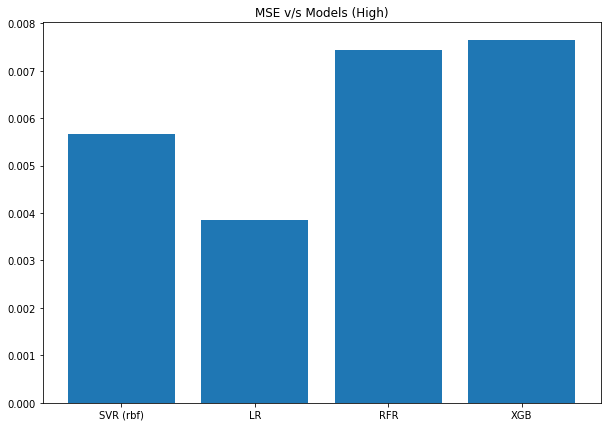

In [59]:
plt.figure(figsize=(10, 7))
plt.bar(range(len(DictHigh)), list(DictHigh.values()), align='center')
plt.xticks(range(len(DictHigh)), list(DictHigh.keys()))
plt.title("MSE v/s Models (High)")
plt.show()

In [60]:
DictLow = {}
DictLow[models[0]] = modelLowHSE[0]
DictLow[models[1]] = modelLowHSE[1]
DictLow[models[2]] = modelLowHSE[2]
DictLow[models[3]] = modelLowHSE[3]

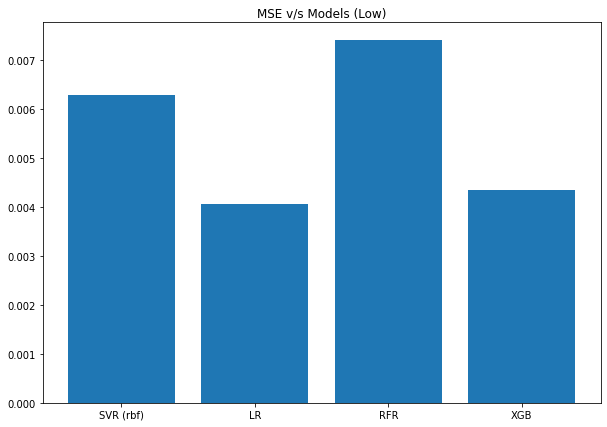

In [61]:
plt.figure(figsize=(10, 7))
plt.bar(range(len(DictLow)), list(DictLow.values()), align='center')
plt.xticks(range(len(DictLow)), list(DictLow.keys()))
plt.title("MSE v/s Models (Low)")
plt.show()

In [62]:
DictClose = {}
DictClose[models[0]] = modelCloseMSE[0]
DictClose[models[1]] = modelCloseMSE[1]
DictClose[models[2]] = modelCloseMSE[2]
DictClose[models[3]] = modelCloseMSE[3]

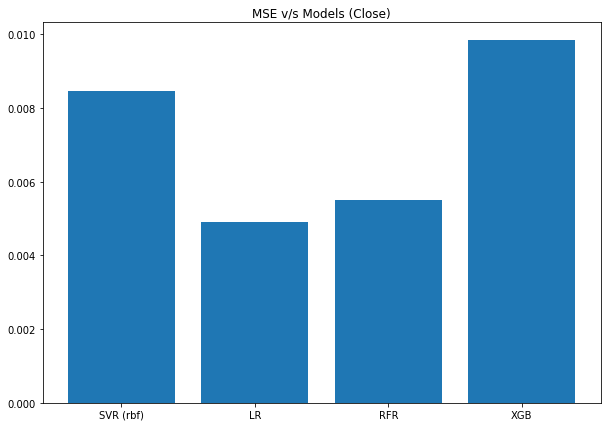

In [63]:
plt.figure(figsize=(10, 7))
plt.bar(range(len(DictClose)), list(DictClose.values()), align='center')
plt.xticks(range(len(DictClose)), list(DictClose.keys()))
plt.title("MSE v/s Models (Close)")
plt.show()

In [64]:
DictVolume = {}
DictVolume[models[0]] = modelVolumeMSE[0]
DictVolume[models[1]] = modelVolumeMSE[1]
DictVolume[models[2]] = modelVolumeMSE[2]
DictVolume[models[3]] = modelVolumeMSE[3]

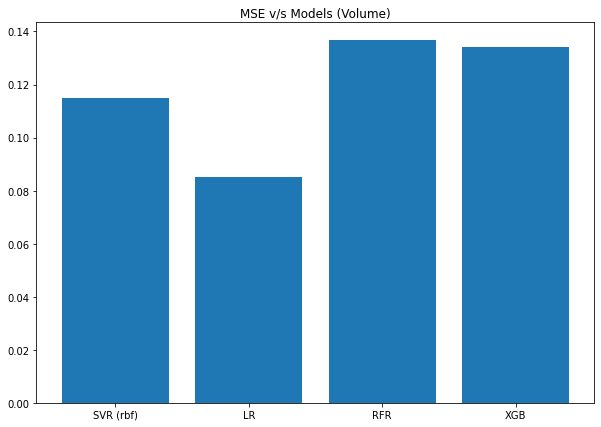

In [65]:
plt.figure(figsize=(10, 7))
plt.bar(range(len(DictVolume)), list(DictVolume.values()), align='center')
plt.xticks(range(len(DictVolume)), list(DictVolume.keys()))
plt.title("MSE v/s Models (Volume)")
plt.show()

In [66]:
DictMarketCap = {}
DictMarketCap[models[0]] = modelMarketCapMSE[0]
DictMarketCap[models[1]] = modelMarketCapMSE[1]
DictMarketCap[models[2]] = modelMarketCapMSE[2]
DictMarketCap[models[3]] = modelMarketCapMSE[3]

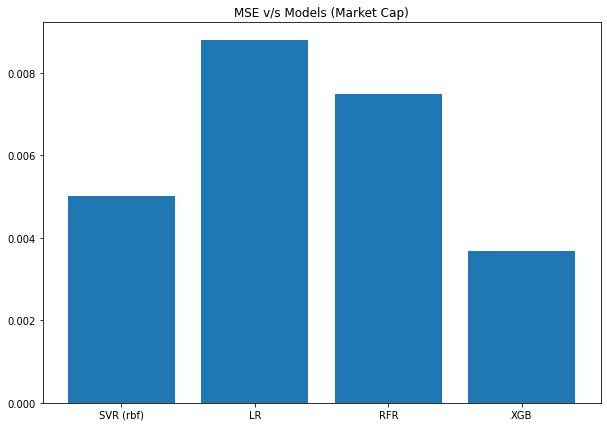

In [67]:
plt.figure(figsize=(10, 7))
plt.bar(range(len(DictMarketCap)), list(DictMarketCap.values()), align='center')
plt.xticks(range(len(DictMarketCap)), list(DictMarketCap.keys()))
plt.title("MSE v/s Models (Market Cap)")
plt.show()

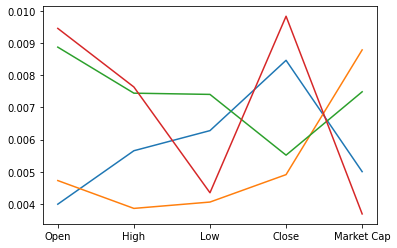

In [68]:
Dict_svr = {}
Dict_svr['Open'] = modelOpenMSE[0]
Dict_svr['High'] = modelHighMSE[0]
Dict_svr['Low'] = modelLowHSE[0]
Dict_svr['Close'] = modelCloseMSE[0]
# Dict_svr['Volume'] = modelVolumeMSE[0]
Dict_svr['Market Cap'] = modelMarketCapMSE[0]
Dict_lr = {}
Dict_lr['Open'] = modelOpenMSE[1]
Dict_lr['High'] = modelHighMSE[1]
Dict_lr['Low'] = modelLowHSE[1]
Dict_lr['Close'] = modelCloseMSE[1]
# Dict_lr['Volume'] = modelVolumeMSE[1]
Dict_lr['Market Cap'] = modelMarketCapMSE[1]
Dict_rfr = {}
Dict_rfr['Open'] = modelOpenMSE[2]
Dict_rfr['High'] = modelHighMSE[2]
Dict_rfr['Low'] = modelLowHSE[2]
Dict_rfr['Close'] = modelCloseMSE[2]
# Dict_rfr['Volume'] = modelVolumeMSE[2]
Dict_rfr['Market Cap'] = modelMarketCapMSE[2]
Dict_xgb = {}
Dict_xgb['Open'] = modelOpenMSE[3]
Dict_xgb['High'] = modelHighMSE[3]
Dict_xgb['Low'] = modelLowHSE[3]
Dict_xgb['Close'] = modelCloseMSE[3]
# Dict_xgb['Volume'] = modelVolumeMSE[3]
Dict_xgb['Market Cap'] = modelMarketCapMSE[3]
plt.plot(range(len(Dict_svr)), list(Dict_svr.values()))
plt.plot(range(len(Dict_lr)), list(Dict_lr.values()))
plt.plot(range(len(Dict_rfr)), list(Dict_rfr.values()))
plt.plot(range(len(Dict_xgb)), list(Dict_xgb.values()))
plt.xticks(range(len(Dict_svr)), list(Dict_svr.keys()))
plt.show()

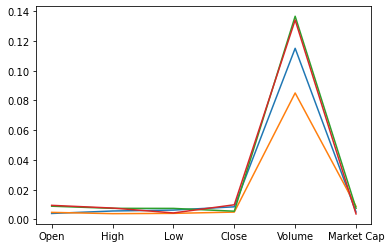

In [69]:
Dict_svr = {}
Dict_svr['Open'] = modelOpenMSE[0]
Dict_svr['High'] = modelHighMSE[0]
Dict_svr['Low'] = modelLowHSE[0]
Dict_svr['Close'] = modelCloseMSE[0]
Dict_svr['Volume'] = modelVolumeMSE[0]
Dict_svr['Market Cap'] = modelMarketCapMSE[0]
Dict_lr = {}
Dict_lr['Open'] = modelOpenMSE[1]
Dict_lr['High'] = modelHighMSE[1]
Dict_lr['Low'] = modelLowHSE[1]
Dict_lr['Close'] = modelCloseMSE[1]
Dict_lr['Volume'] = modelVolumeMSE[1]
Dict_lr['Market Cap'] = modelMarketCapMSE[1]
Dict_rfr = {}
Dict_rfr['Open'] = modelOpenMSE[2]
Dict_rfr['High'] = modelHighMSE[2]
Dict_rfr['Low'] = modelLowHSE[2]
Dict_rfr['Close'] = modelCloseMSE[2]
Dict_rfr['Volume'] = modelVolumeMSE[2]
Dict_rfr['Market Cap'] = modelMarketCapMSE[2]
Dict_xgb = {}
Dict_xgb['Open'] = modelOpenMSE[3]
Dict_xgb['High'] = modelHighMSE[3]
Dict_xgb['Low'] = modelLowHSE[3]
Dict_xgb['Close'] = modelCloseMSE[3]
Dict_xgb['Volume'] = modelVolumeMSE[3]
Dict_xgb['Market Cap'] = modelMarketCapMSE[3]
plt.plot(range(len(Dict_svr)), list(Dict_svr.values()))
plt.plot(range(len(Dict_lr)), list(Dict_lr.values()))
plt.plot(range(len(Dict_rfr)), list(Dict_rfr.values()))
plt.plot(range(len(Dict_xgb)), list(Dict_xgb.values()))
plt.xticks(range(len(Dict_svr)), list(Dict_svr.keys()))
plt.show()

In [70]:
df_comparison = pd.DataFrame({'Models': models, 'Open Price MSE': modelOpenMSE, 'High Price MSE': modelHighMSE, 'Low Price MSE': modelLowHSE, 'Close Price MSE': modelCloseMSE, 'Volume Price MSE': modelVolumeMSE, 'Market Cap Price MSE': modelMarketCapMSE})
df_comparison

,Models,Open Price MSE,High Price MSE,Low Price MSE,Close Price MSE,Volume Price MSE,Market Cap Price MSE
0,SVR (rbf),0.003992,0.005654,0.006280,0.008465,0.115070,0.005004
1,LR,0.004727,0.003861,0.004058,0.004911,0.085030,0.008789
2,RFR,0.008875,0.007444,0.007405,0.005516,0.136638,0.007487
3,XGB,0.009458,0.007636,0.004347,0.009836,0.134080,0.003689
